Epoch 1/20
160/160 [==============================] - 35s 211ms/step - loss: 6.3890 - accuracy: 0.6729 - val_loss: 3.2125 - val_accuracy: 0.7031
Epoch 2/20
160/160 [==============================] - 34s 210ms/step - loss: 5.9284 - accuracy: 0.7064 - val_loss: 2.5750 - val_accuracy: 0.6828
Epoch 3/20
160/160 [==============================] - 34s 210ms/step - loss: 2.6454 - accuracy: 0.7387 - val_loss: 2.3920 - val_accuracy: 0.7055
Epoch 4/20
160/160 [==============================] - 34s 210ms/step - loss: 3.1573 - accuracy: 0.7348 - val_loss: 2.8594 - val_accuracy: 0.7141
Epoch 5/20
160/160 [==============================] - 34s 211ms/step - loss: 1.5822 - accuracy: 0.7727 - val_loss: 1.3884 - val_accuracy: 0.7031
Epoch 6/20
160/160 [==============================] - 34s 213ms/step - loss: 1.4119 - accuracy: 0.7678 - val_loss: 1.8365 - val_accuracy: 0.6883
Epoch 7/20
160/160 [==============================] - 33s 209ms/step - loss: 1.2233 - accuracy: 0.7699 - val_loss: 0.9775 - val_ac

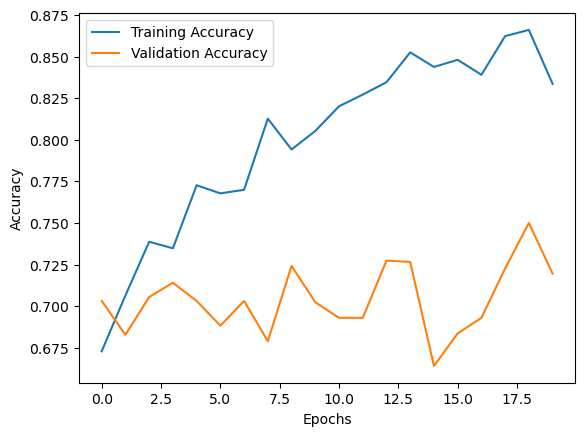

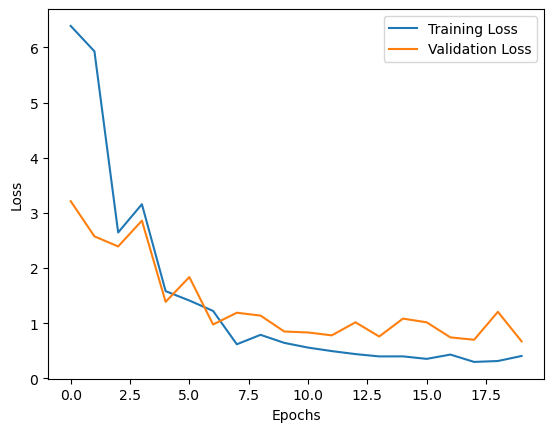

In [10]:
import os
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

def load_dataset(directory, label):
    data = []
    labels = []
    for filename in os.listdir(directory):
        path = os.path.join(directory, filename)
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        lsb = image & 1
        lsb = lsb.flatten()
        data.append(lsb)
        labels.append(label)
    return np.array(data), np.array(labels)

clean_data, clean_labels = load_dataset('Downloads/archive-2/test/test/clean', 0)
stego_data, stego_labels = load_dataset('Downloads/archive-2/test/test/stego', 1)
X = np.concatenate((clean_data, stego_data), axis=0)
y = np.concatenate((clean_labels, stego_labels), axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

model.save('lsb_steganography_model.h5')

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 [==============================] - 0s 441ms/step


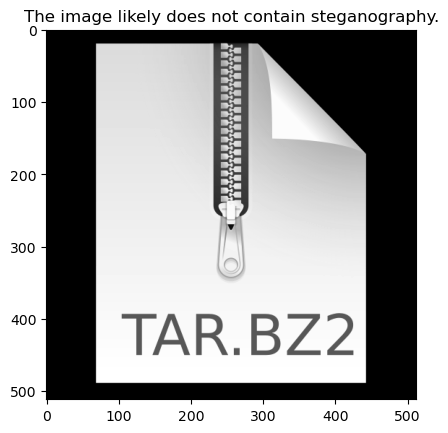

In [5]:
import cv2
import numpy as np
from tensorflow.keras import models
import matplotlib.pyplot as plt

model = models.load_model('lsb_steganography_model.h5')

def is_steganography(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) 
    image = cv2.resize(image, (512, 512))
    lsb = image & 1
    lsb_flat = lsb.flatten()
    input_data = np.reshape(lsb_flat, (1, -1))
    prediction = model.predict(input_data)
    if prediction > 0.5:
        result = "The image likely contains steganography."
    else:
        result = "The image likely does not contain steganography."
    plt.imshow(image, cmap='gray')
    plt.title(result)
    plt.show()
image_path = 'Downloads/archive-2/test/test/clean_sample.png'
is_steganography(image_path)
